# [NLP] Assignment 1: Tokenization

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !

In [237]:
# !pip freeze > requirements.txt

In [ ]:
# !pip install gdown==4.6.3

In [1]:
import gdown
import zipfile
import warnings
import re, collections

warnings.filterwarnings('ignore')

In [2]:
# Loading data
url = "https://drive.google.com/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw"

output = "./Assignment1_data.zip"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw
To: /content/Assignment1_data.zip
100%|██████████| 15.6k/15.6k [00:00<00:00, 11.4MB/s]


'./Assignment1_data.zip'

In [3]:
path_file = './Assignment1_data.zip'
output_dir = './Assignment1_data/'

with zipfile.ZipFile(path_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

In [139]:
sentences = open(output_dir + 'file2', 'r').readlines()[:15]
for sentence in sentences:
    print(sentence)

Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

Its american tradition bitch

@ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

" RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

@dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

Hey doll! Great I missed True Blood yday boo lol Rt @Fra


    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its , american , tradition , bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , . , . , . , Then , louder , ones

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , - , - , - , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25 , MB , http://bit.ly/62mjw , Nice , ! , ! , !

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , Burger , King , ' , s , Sales , / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik , weet , niet , wie , er , achter , de , T-Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , . , . , . , Best , vreemd , eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [231]:
from typing import List
import string

# Code snippets from BPE was found at
# https://arxiv.org/pdf/1508.07909.pdf

# Here I considered spaces as part of token and
# replaced it by special symbol "Ġ"

class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        """
        Initializing tokenizer

        :param vocab_size: size of vocabulary list
        """
        self.vocab_size = vocab_size

        # Mapping unmerged symbols to merged ones
        self.transfers = collections.defaultdict(int)

        # Frequency of words occurrence in the training set
        self.freq = collections.defaultdict(int)

        # Vocabulary list
        self.vocab = []

        # Special symbol for spaces replacement
        self.separator = 'Ġ'

        # List of punctuation
        self.punct_list = string.punctuation

    def get_stats(self, frequies):
        """
        Calculating frequency of occurrence of sub-grams

        :param frequies: Dictionary of word's sub-grams as keys and frequency as value
        :return: Updated frequency dictionary
        """
        pairs = collections.defaultdict(int)
        for word, freq in frequies.items():
            symbols = word.split()

            # Consider pairs of sub-grams
            for i in range(len(symbols)-1):
                pairs[symbols[i],symbols[i+1]] += freq
        return pairs

    def merge_vocab(self, pair, v_in):
        """
        Merging of sub-grams within frequency dictionary

        :param pair: Pair of sub-grams to be merged
        :param v_in: Old frequency dictionary
        :return: Updated frequency dictionary
        """
        v_out = {}
        bigram = re.escape(' '.join(pair))
        p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

        # Searching for sub-grams, which should be merged toghether
        for word in v_in:
            w_out = p.sub(''.join(pair), word)
            v_out[w_out] = v_in[word]

        # Adding to marge dictionary which sub-grams was merged to which form
        self.transfers[pair] = ''.join(pair)
        return v_out

    def base_tokenize(self, sentence: str) -> list:
        """
        Simple custom tokenizer

        :param sentence: Sentence to be tokenized
        :return: List of tokens
        """
        tokens = []
        word = ''
        flag = False
        for symbol in sentence:
            if symbol not in self.vocab:
                # Append each new symbol to vocabulary
                self.vocab.append(symbol)

            if symbol in self.punct_list:
                # Punctuation symbols are append separately
                if len(word) != 0:
                    tokens.append(word)
                word = symbol
                flag = True
            elif symbol == ' ':
                # Spaces should be replaced by special symbol
                word += self.separator
                tokens.append(word)
                word = ''
                flag = False
            else:
                # Other symbols should be considered toghether until space or punctuation met
                if flag:
                    tokens.append(word)
                    word = symbol
                    flag = False
                else:
                    word += symbol
        tokens.append(word)
        return tokens

    def train(self, corpus: List[str], flag = True) -> None:
        """
        Training tokenizer on train set

        :param corpus: List of sentence form training set
        :param flag: Only for base vocab size
        """
        for sentense in corpus:
            if len(self.vocab) == self.vocab_size:
                # Limit the size of vocabulary
                break
            # Use custom tokenizer and split each token on characters
            base_tokens = self.base_tokenize(sentense)
            spare_tokens = [' '.join(token) for token in base_tokens]

            # Calculate base frequency
            for token in spare_tokens:
                self.freq[token] += 1
                if len(self.vocab) == self.vocab_size:
                    # Limit the size of vocabulary
                    break
        if flag:
            # If base size vocab is not required
            while len(self.vocab) < self.vocab_size:
                # Limit the size of vocabulary
                pairs = self.get_stats(self.freq)
                if len(pairs) == 0:
                    break
                # Merge pairs of sub-grams with highest frequency
                best = max(pairs, key=pairs.get)
                self.vocab.append("".join(best))
                self.freq = self.merge_vocab(best, self.freq)

    def tokenize(self, text: str) -> List[str]:
        """
        BPE text tokenizer

        :param text: String text
        :return: List of tokens
        """
        # Replace spaces by separator
        output = list(text.replace(' ', self.separator))
        for a, b in self.transfers:
            i = 0
            while i < len(output) - 1:
                # Using merge dictionary to merge sub-grams
                if a == output[i] and b == output[i+1]:
                    output[i] = self.transfers[(a,b)]
                    del output[i + 1]
                i += 1
        return list(output)

### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [232]:
all_sentences = []

# Extract all tweets from 5 files
for i in range(1, 6):
    sentences = open(output_dir + 'file' + str(i), 'r').read().split('\n')
    all_sentences += sentences

# Perform train/test split
ratio = 0.8
sent_len = int(len(all_sentences)*ratio)
train, test = all_sentences[:sent_len], all_sentences[sent_len:]

avg_len = []
tokens_num = [0, 250, 500, 750, 1000, 1500] # 0 is for base vocab size
for i, num in enumerate(tokens_num):
    tokens_len = 0
    # Train tokenizer on train set
    if num == 0:
        tok = BPETokenizer(10000)
        tok.train(train, flag = False)
    else:
        tok = BPETokenizer(num)
        tok.train(train, flag = True)

    # Calculate avg number of tokens in sentences from test set
    for sent in test:
        tokens = tok.tokenize(sent)
        tokens_len += len(tokens)
    tokens_len /= len(test)
    avg_len.append(tokens_len)
    print(f"Size: {num}, avg tokens: {tokens_len}")

Size: 0, avg tokens: 94.93333333333334
Size: 250, avg tokens: 63.8
Size: 500, avg tokens: 52.62222222222222
Size: 750, avg tokens: 49.62222222222222
Size: 1000, avg tokens: 48.111111111111114
Size: 1500, avg tokens: 46.37777777777778


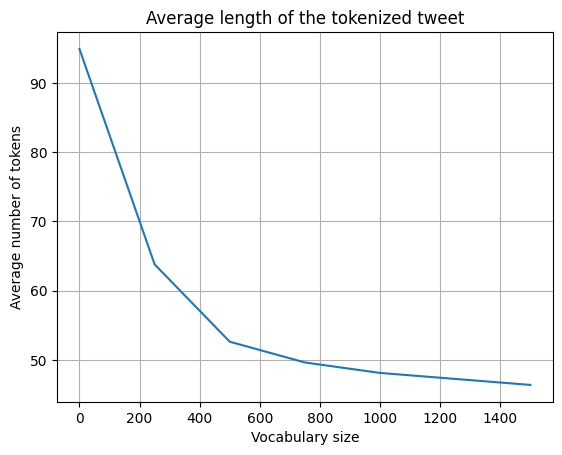

In [233]:
import matplotlib.pyplot as plt

plt.plot(tokens_num, avg_len)
plt.title("Average length of the tokenized tweet")
plt.xlabel("Vocabulary size")
plt.ylabel("Average number of tokens")
plt.grid()
plt.show()

### Answer:
As the result with growth of vocab size the average number of tokens in sentences decreses. It was expected, as now vocabulary may contain longer tokens from train set.

As far as avg number of tokens after around 750 vocab size will not decrease significantly and time for training procedure is still quite high in comparison with larger vocab sizes, it may be more preferable to have vocab size around 750.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.

In [234]:
import urllib.request
import pandas as pd

# For analysis I used sentences from Russian dataset RuDSI
# https://github.com/kategavrishina/RuDSI/tree/main/data

url = "https://raw.githubusercontent.com/kategavrishina/RuDSI/main/data/%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0/uses.csv"
urllib.request.urlretrieve(url, "./work.csv")
url = "https://raw.githubusercontent.com/kategavrishina/RuDSI/main/data/%D0%B3%D0%BE%D1%80%D0%BE%D0%B4/uses.csv"
urllib.request.urlretrieve(url, "./city.csv")
url = "https://raw.githubusercontent.com/kategavrishina/RuDSI/main/data/%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA/uses.csv"
urllib.request.urlretrieve(url, "./human.csv")
url = "https://raw.githubusercontent.com/kategavrishina/RuDSI/main/data/%D0%B2%D1%80%D0%B5%D0%BC%D1%8F/uses.csv"
urllib.request.urlretrieve(url, "./time.csv")

sent_1 = pd.read_csv("./work.csv", sep='\t')['context'].to_list()
sent_2 = pd.read_csv("./city.csv", sep='\t')['context'].to_list()
sent_3 = pd.read_csv("./human.csv", sep='\t')['context'].to_list()
sent_4 = pd.read_csv("./time.csv", sep='\t')['context'].to_list()
all_sentences = sent_1 + sent_2 + sent_3 + sent_4

In [235]:
# Perform train/test split
ratio = 0.8
sent_len = int(len(all_sentences)*ratio)
train, test = all_sentences[:sent_len], all_sentences[sent_len:]

avg_len = []
tokens_num = [0, 250, 500, 750, 1000, 1500] # 0 is for base vocab size
for i, num in enumerate(tokens_num):
    tokens_len = 0
    # Train tokenizer on train set
    if num == 0:
        tok = BPETokenizer(10000)
        tok.train(train, flag = False)
    else:
        tok = BPETokenizer(num)
        tok.train(train, flag = True)

    # Calculate avg number of tokens in sentences from test set
    for sent in test:
        tokens = tok.tokenize(sent)
        tokens_len += len(tokens)
    tokens_len /= len(test)
    avg_len.append(tokens_len)
    print(f"Size: {num}, avg tokens: {tokens_len}")

Size: 0, avg tokens: 168.03571428571428
Size: 250, avg tokens: 98.07142857142857
Size: 500, avg tokens: 84.10714285714286
Size: 750, avg tokens: 78.25
Size: 1000, avg tokens: 75.21428571428571
Size: 1500, avg tokens: 71.82142857142857


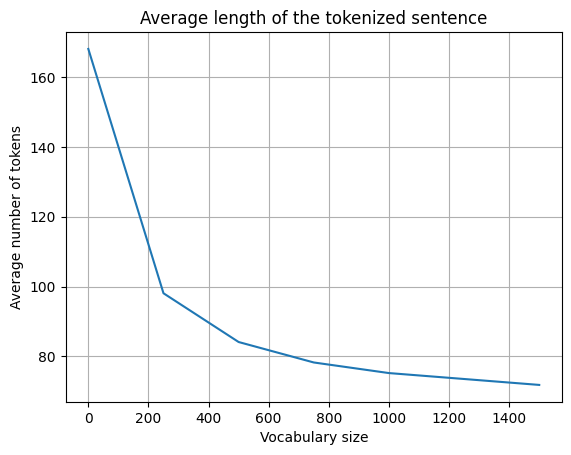

In [238]:
plt.plot(tokens_num, avg_len)
plt.title("Average length of the tokenized sentence")
plt.xlabel("Vocabulary size")
plt.ylabel("Average number of tokens")
plt.grid()
plt.show()

### Answer:
As the result with growth of vocab size the average number of tokens in sentences decreses. It was expected, as now vocabulary may contain longer tokens from train set.

As far as avg number of tokens after around 750 vocab size will not decrease significantly and time for training procedure is still quite high in comparison with larger vocab sizes, it may be more preferable to have vocab size around 750.

The results are pretty same as for Tweets dataset, but for Russian dataset is larger avg number of tokens, which may happen as Russian language have more characters, than English. Also, the length of sentences is a bit longer for Russian dataset.

## References:

[1] - R. Sennrich, B. Haddow, and A. Birch, “Neural machine translation of rare words with subword units,” arXiv [cs.CL], 2015.

[2] - RuDSI: Word sense induction (WSI) dataset for Russian.

[3] - “Byte-pair encoding tokenization - hugging face NLP course,” Huggingface.co. [Online]. Available: https://huggingface.co/learn/nlp-course/chapter6/5. [Accessed: 11-Feb-2024].